# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/week 2/foodhub_order.csv')
# returns the first 5 rows
df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
#In order to get the shape of a dataframe we can use shape
#to know the number of rows and columns it has.
df.shape

(1898, 9)

#### Observations:
The dataframe consists of 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see that there is only one column with a float data type (cost_of_the_order), four columns consisting of integer numbers (order_id, customer_id, food_preparation_time, delivery_time) and four columns of object data type (restaurant_name, cuisine_type, day_of_the_week, rating).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
#isnull() function returns boolean values indicating wether or not
#a specific element is null. Then with sum() we can get the total amount of
#null values in a series or dataframe.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [6]:

#Replacing not rated order with NaN to allow further statistics with respect to rating
df["rating"].replace(to_replace="Not given", value=np.nan, inplace=True)
df["rating"]=df["rating"].astype(float)

#### Observations:
There are no null values in any column nevertheless there are non-rated orders described as "Not given" instead of a number in the "rating" column. Hence, not rated orders described as "Not given" are replaced by NaN that allows further statistics regarding to rating.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
#It is separated in two the statistical summary for numerical and
#categorical variables in order to get a better understanding.

#Here we are not considering the customer_id and order_id columns since
#it does not provide meaningful insight, at least at this stage.
df[["cost_of_the_order","rating","food_preparation_time","delivery_time"]].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1162.0,4.344234,0.741478,3.00,4.00,5.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


In [8]:
#Here we consider the categorical variables.
df[["restaurant_name","cuisine_type","day_of_the_week"]].describe().T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351


#### Observations:
The minimum time to prepare an order is 20 minutes, and the maximum food preparation time is 35 minutes whilst the average time to prepare an order is around 27 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
#Using isnull() function again we can get the number of NaN values
#that were replaced in question 3.
df.isnull().sum()


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
There are 736 non-rated orders in the dataframe.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='day_of_the_week', ylabel='count'>

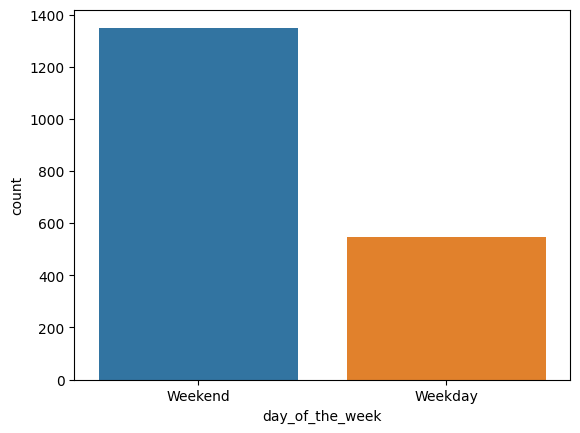

In [10]:
# Write the code here
#The total number of orders depending on the day of the week
sns.countplot(data=df, x="day_of_the_week")

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

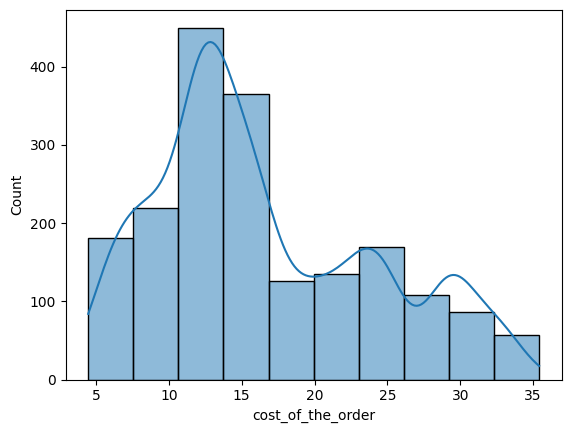

In [11]:
#Visualizing the cost of orders
sns.histplot(data=df, x="cost_of_the_order",bins=10, kde=True)


<Axes: xlabel='food_preparation_time', ylabel='Count'>

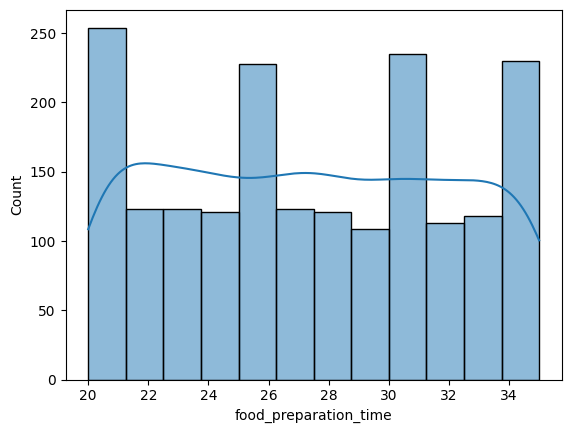

In [12]:
#Plotting a histogram to visualize the food time preparation
sns.histplot(data=df,x="food_preparation_time", kde=True)

<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

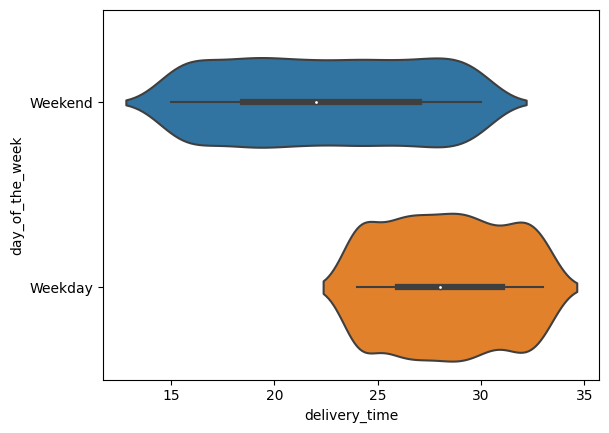

In [13]:
#Visualizing the delivery time depending on the day of the week.
sns.violinplot(data=df,x="delivery_time", y="day_of_the_week")

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [14]:
# Write the code here
#Using value_counts() it is given the total amount of orders for each restaurant
#then it is sorted the top 5 with head().
print(df["restaurant_name"].value_counts().head())


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [15]:
# Write the code here
#Here the orders are grouped by the day of the week they were placed
#and the cuisine type.
df.groupby(["day_of_the_week"])["cuisine_type"].value_counts()


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American, Japanese, Italian, Chinese and Mexican are the top 5 cuisines with most orders on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [16]:
# Write the code here
#Using value_count() with the condition for orders to be greater than 20 dls
#normalizaing we get the proportion of true and false for the greater than 20 statement
(df["cost_of_the_order"]>20).value_counts(normalize=True)

False    0.707587
True     0.292413
Name: cost_of_the_order, dtype: float64

#### Observations:
Around 29 percent of orders costs above 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [17]:
# Write the code here
#Using mean() we get the mean for the delivery_time column
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The average time it takes food to be delivered is around 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [18]:
# Write the code here
df["customer_id"].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
The top 3 customers id are 52832, 47440, 83287 with 13, 10 and 9 placed orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [19]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [20]:
# Write the code here
'''
The data is grouped by the rating of each restaurant such that if
for each restaurant its mean rating is greater than 4 and its ratings sum
is greater than 50 it is printed True along the name of the restaurant.
'''
rt = df.groupby(["restaurant_name"])["rating"].apply(lambda x: "True" if ((x.mean()>4) & (x.sum()>50)) else 'False')
rt.sort_values(ascending=False).head(30)

restaurant_name
Five Guys Burgers and Fries               True
Jack's Wife Freda                         True
The Meatball Shop                         True
Cafe Mogador                              True
The Smile                                 True
Han Dynasty                               True
Tamarind TriBeCa                          True
TAO                                       True
Sushi of Gari Tribeca                     True
Blue Ribbon Sushi Izakaya                 True
Blue Ribbon Sushi Bar & Grill             True
Blue Ribbon Sushi                         True
Blue Ribbon Fried Chicken                 True
Sushi of Gari 46                          True
Parm                                      True
J. G. Melon                               True
RedFarm Broadway                          True
Rubirosa                                  True
ilili Restaurant                          True
Momoya                                    True
Nobu Next Door                            Tr

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [21]:
# Write the code here
'''
Creating a list of comprehension across the cost of all orders
with the required conditional statement.
'''
rev = sum([x*0.25 if x > 20 else x*0.15 if x>5 else 0 for x in df["cost_of_the_order"]])
print("Total revenue:",rev, "dollars")


Total revenue: 6166.302999999994 dollars


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [22]:
# Write the code here
((df["food_preparation_time"] + df["delivery_time"])>=60).value_counts(normalize=True)*100

False    87.091675
True     12.908325
dtype: float64

#### Observations:
The percentage of orders that take more than 60 minutes is 12.9%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

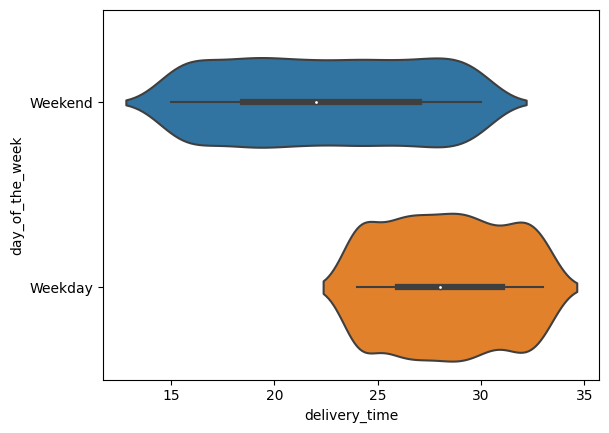

In [23]:
# Write the code here
sns.violinplot(data=df,x="delivery_time", y="day_of_the_week")


In [24]:
df.groupby("day_of_the_week")["delivery_time"].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---